# Subtype Composition
The goal of this experiment is to investigate how relevant phenotypic variables are represented within the subtypes (i.e. what is the percentage of subjects with an ASD diagnosis). The phenotypic variables I am going to investigate are: 

- Diagnosis (2 level)
- Diagnosis (4 level)
- Site
- Age (3 year bins)

The goal is to have 5 pie charts per network (one for each subtype) that are scaled by the number of subjects in that subtype and then represent them in a grid of 5 * #networks for one variable.

In [1]:
# Imports
import os
import glob
import time
import numpy as np
import pandas as pd
import nibabel as nib
import brainbox as bb
import nilearn as nil
import statsmodels.api as sm
from scipy import stats as st
from matplotlib import gridspec
from scipy import cluster as scl
from nilearn import plotting as nlp
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import linear_model as slin
from statsmodels.sandbox import stats as sts
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.sandbox.stats import multicomp as smi

In [2]:
%matplotlib inline

## Paths

In [3]:
# Variables
subtypes = 5
cov = 'ADOS_SOCOM_SEV'
scale = 7
mtp = 'rmap_part'
name = 'site_236_within'
pheno_path = '/data1/abide/Pheno/site_full_balanced_236.csv'

# Fixed values
prior_path = '/data1/cambridge/template/template_cambridge_basc_multiscale_sym_scale{:03d}.nii.gz'.format(scale)
mask_path = '/data1/abide/Mask/mask_data_specific.nii.gz'
in_path = '/data1/subtypes/serial_preps/'

netstack_path = os.path.join(in_path, 'netstack_dmn_{}_{}_scale_{:03d}.npy'.format(mtp, name, scale))
netraw_path = os.path.join(in_path, 'netstack_raw_{}_{}_scale_{:03d}.npy'.format(mtp, name, scale))
corrmat_path = os.path.join(in_path, 'correlation_matrix_{}_{}_scale_{:03d}.npy'.format(mtp, name, scale))

In [4]:
# Get the phenotype data
pheno = pd.read_csv(pheno_path)

In [5]:
# Get the correlation matrix
corrmat_path = os.path.join(in_path, 'correlation_matrix_{}_{}_scale_{:03d}.npy'.format(mtp, name, scale))
corr_mat = np.load(corrmat_path)

In [6]:
# Loop through the networks
n_sub = corr_mat.shape[1]
part_store = np.zeros((scale, n_sub))
for net_id in range(scale):
    # Compute linkage with Ward's criterion
    link_mat = scl.hierarchy.linkage(corr_mat[net_id, ...] , method='ward')
    # Partition the linkage to get a given number of subtypes
    part_sub = scl.hierarchy.fcluster(link_mat, subtypes, criterion='maxclust')
    part_store[net_id, :] = part_sub

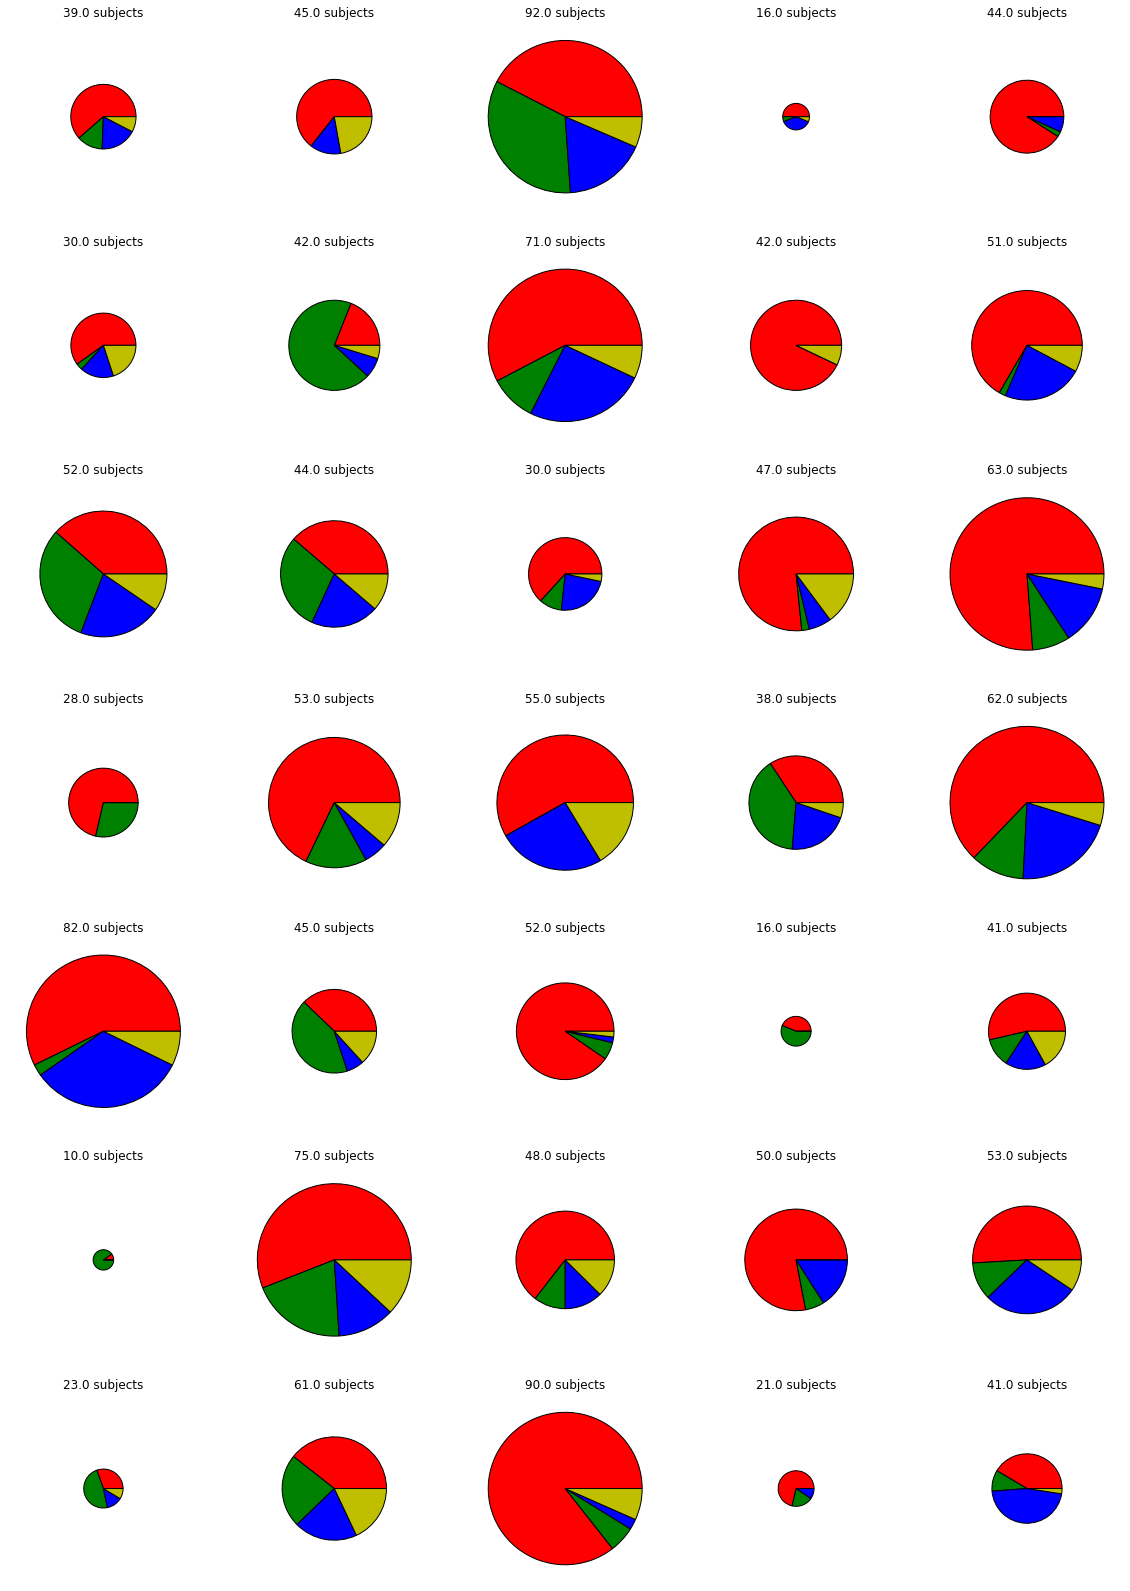

In [10]:
fig = plt.figure(figsize=(20,scale*4))
gs = gridspec.GridSpec(scale, 5)

cov = 'SITE_ID'
options = ['NYU', 'PITT', 'UCLA', 'USM']
nopt = len(options)
counts = np.zeros((scale))
counts = np.zeros((scale, 5, nopt))

for nid in np.arange(scale):
    part = part_store[nid, :]
    for sid in np.arange(5):
        for oid, opt in enumerate(options):
            if opt in pheno[cov][part==sid+1].values:
                counts[nid, sid, oid] = pheno[cov][part==sid+1].value_counts()[opt]
            else:
                counts[nid, sid, oid] = 0
    big_sbt = np.max(np.sum(counts[nid, ...], 1))
    
    for sid in np.arange(5):
        scn = counts[nid, sid, :]
        ssz = np.sum(scn)/np.float(big_sbt)
        
        ax = fig.add_subplot(gs[nid, sid])
        ax.pie(list(scn), radius=ssz, colors=['r', 'g', 'b', 'y'])
        ax.set_title('{} subjects'.format(np.sum(scn)))

Not good, experiment is cancelled, need better sample.

In [12]:
fullc = [pheno['SITE_ID'][part==sid+1].value_counts()[opt] for opt in options]

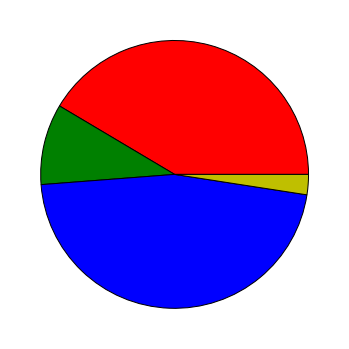

In [13]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
tmp = ax.pie(fullc, colors=['r', 'g', 'b', 'y'])

Ok, with the new sample, this is more interesting. But I don't quite know how to 